## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load datasets

In [2]:
# Training data
x_train = pd.read_csv('train_X.csv')
y_train = pd.read_csv('train_Y.csv')

# Testing data
x_test = pd.read_csv('test_X.csv')
y_test = pd.read_csv('test_Y.csv')

In [3]:
x_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [4]:
y_train.head()

,Id,Survived
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0


## Prepare the data

In [5]:
# As seen, the data contains an useless column (id column), it should be deleted
# Drop the id column
x_train = x_train.drop("Id", axis = 1)
y_train = y_train.drop("Id", axis = 1)
x_test = x_test.drop("Id", axis = 1)
y_test = y_test.drop("Id", axis = 1)

# Add the ones column, it should be used with theta 0
x_train.insert(0, 'Ones', 1)
x_test.insert(0, 'Ones', 1)

In [6]:
x_train.head()

,Ones,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,1,3,0,35.0,0,0,8.0500,1


In [7]:
# Convert dataframe to array
x_train = x_train.values
y_train = y_train.values
x_test = x_test.values
y_test = y_test.values

## Build the logistic regression model

In [8]:
# Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [9]:
#Create the logistic regression model
def cl_model(X, y, alpha, iterations):
    
    m, n = X.shape
    theta = (np.zeros(n)).reshape(n, 1)
    cost_list = []
    
    for i in range(iterations):
        
        a = sigmoid(np.dot(X, theta))
        cost = (-1/m) * np.sum(y * np.log(a) + (1-y) * np.log(1 - a))
    
        dtheta = np.dot(X.T, (a-y))
        theta = theta - (alpha / m) * dtheta
        cost_list.append(cost)
        
    return theta, cost_list

In [10]:
# Training the model
alpha = 0.001
iterations = 200000
theta, cost = cl_model(x_train, y_train, alpha, iterations)

## Plot the cost function

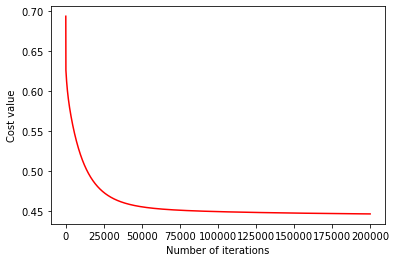

In [11]:
# Polotting the cost function 
x_cost = np.arange(0, iterations)
plt.plot(x_cost, cost, 'r')
plt.xlabel('Number of iterations')
plt.ylabel('Cost value')
plt.show()

## The accuracy of the model

In [12]:
# Calcul the accurancy of the model by using the test dataset
def predict(x):
    return sigmoid(np.dot(x, theta))

y_pred = predict(x_test)
y_pred = y_pred > 0.5
y_pred = np.array(y_pred, dtype='int32')


accurancy = (1 - (np.sum(np.abs(y_test - y_pred)) / y_pred.size )) * 100
print(f'The accurancy of the model is : {round(accurancy, 2)} %.')

The accurancy of the model is : 91.39 %.
